# IT Academy - Data Science with Python
## S16 T01: Advanced Machine Learning (In process)
### [Github Advanced Machine Learning](https://github.com/jesussantana/Advanced-Machine-Learning)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  

## Auto Import Python Libraries

https://pypi.org/project/pyforest/

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
# ^^^ pyforest auto-imports - don't write above this line
# ==============================================================================
# Auto Import Dependencies
# ==============================================================================
# pyforest imports dependencies according to use in the notebook
# ==============================================================================

import pyforest

In [2]:
# Dependencies not Included in Auto Import*
# ==============================================================================

# Data wrangling
# ==============================================================================
import missingno as msno 

# Preprocessing and modeling
# ==============================================================================
from sklearn.preprocessing import OrdinalEncoder

# Metrics
# ==============================================================================
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, euclidean_distances, accuracy_score

# Model Feature
# ==============================================================================
from sklearn.feature_extraction.text import CountVectorizer

# Model Selection
# ==============================================================================
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RepeatedKFold

# Model 
# ==============================================================================
from sklearn.naive_bayes import MultinomialNB

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Paralllel Processing
# ==============================================================================
import multiprocessing
from joblib import Parallel, delayed, dump, load

# nltk Tokenize
# ==============================================================================
import nltk

#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('vader_lexicon')
    
from nltk.corpus import stopwords
from nltk.corpus import treebank
from nltk.corpus import wordnet

from nltk.tokenize import sent_tokenize, word_tokenize, WordPunctTokenizer, regexp_tokenize, RegexpTokenizer

from nltk.probability import FreqDist

from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Others Plots
# ==============================================================================
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud

# Matplotlib configuration
# ==============================================================================
import matplotlib.ticker as ticker
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

## Level 1

- Exercise 1: 
  - Take the data set you want and do a pipeline and a gridsearch using the Random Forest algorithm.



In [3]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/forestfires.csv'

df_raw = pd.read_csv(path+file)

# Data Description
## Foret Fires csv

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

## Exploratory analysis


In [4]:
df = df_raw.copy()

In [5]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
df.shape

(517, 13)

In [8]:
df.isna().sum().sort_values()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [10]:
df.isna().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

## Distribution of the response variable

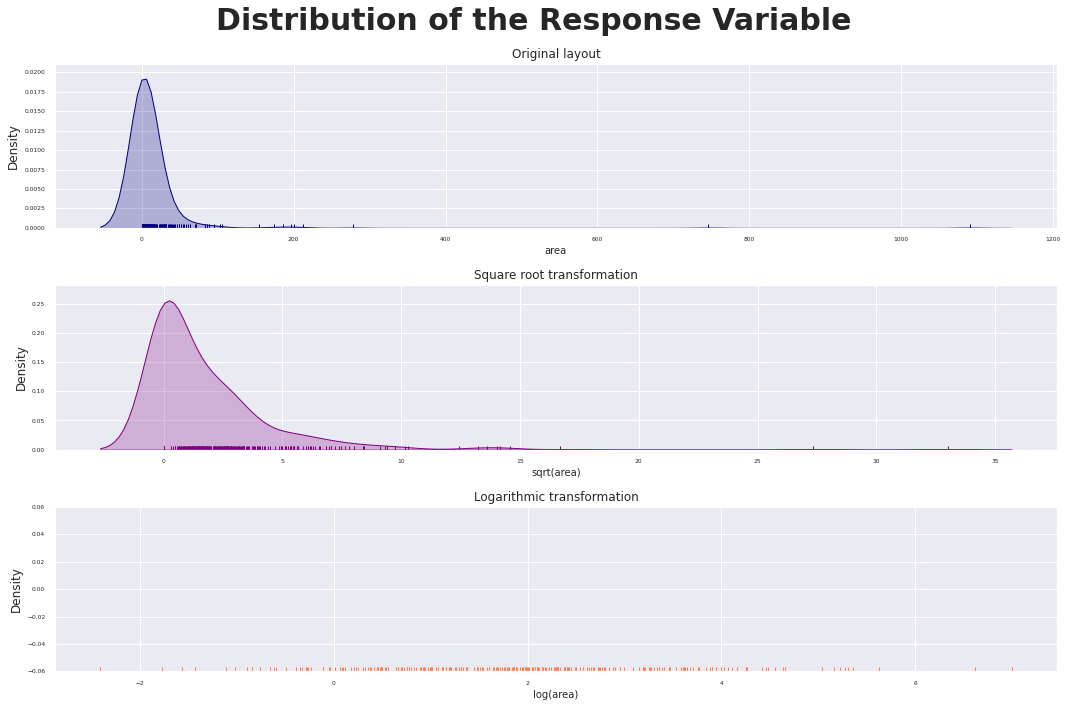

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.area,
    hist    = False,
    rug     = True,
    color   = "navy",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('area', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.area),
    hist    = False,
    rug     = True,
    color   = "purple",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(area)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.area),
    hist    = False,
    rug     = True,
    color   = "coral",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(area)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.suptitle('Distribution of the Response Variable', fontsize = 30, fontweight = "bold")
fig.tight_layout()
plt.savefig("../reports/figures/Distribution_Response_Variable.png")

## Numerical variables

In [12]:
df.select_dtypes(include=['float64', 'int']).describe().round(3)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000,517.00,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000
mean,4.669,4.30,90.645,110.872,547.940,9.022,18.889,44.288,4.018,0.022,12.847
std,2.314,1.23,5.520,64.046,248.066,4.559,5.807,16.317,1.792,0.296,63.656
min,1.000,2.00,18.700,1.100,7.900,0.000,2.200,15.000,0.400,0.000,0.000
25%,3.000,4.00,90.200,68.600,437.700,6.500,15.500,33.000,2.700,0.000,0.000
50%,4.000,4.00,91.600,108.300,664.200,8.400,19.300,42.000,4.000,0.000,0.520
75%,7.000,5.00,92.900,142.400,713.900,10.800,22.800,53.000,4.900,0.000,6.570
max,9.000,9.00,96.200,291.300,860.600,56.100,33.300,100.000,9.400,6.400,1090.840


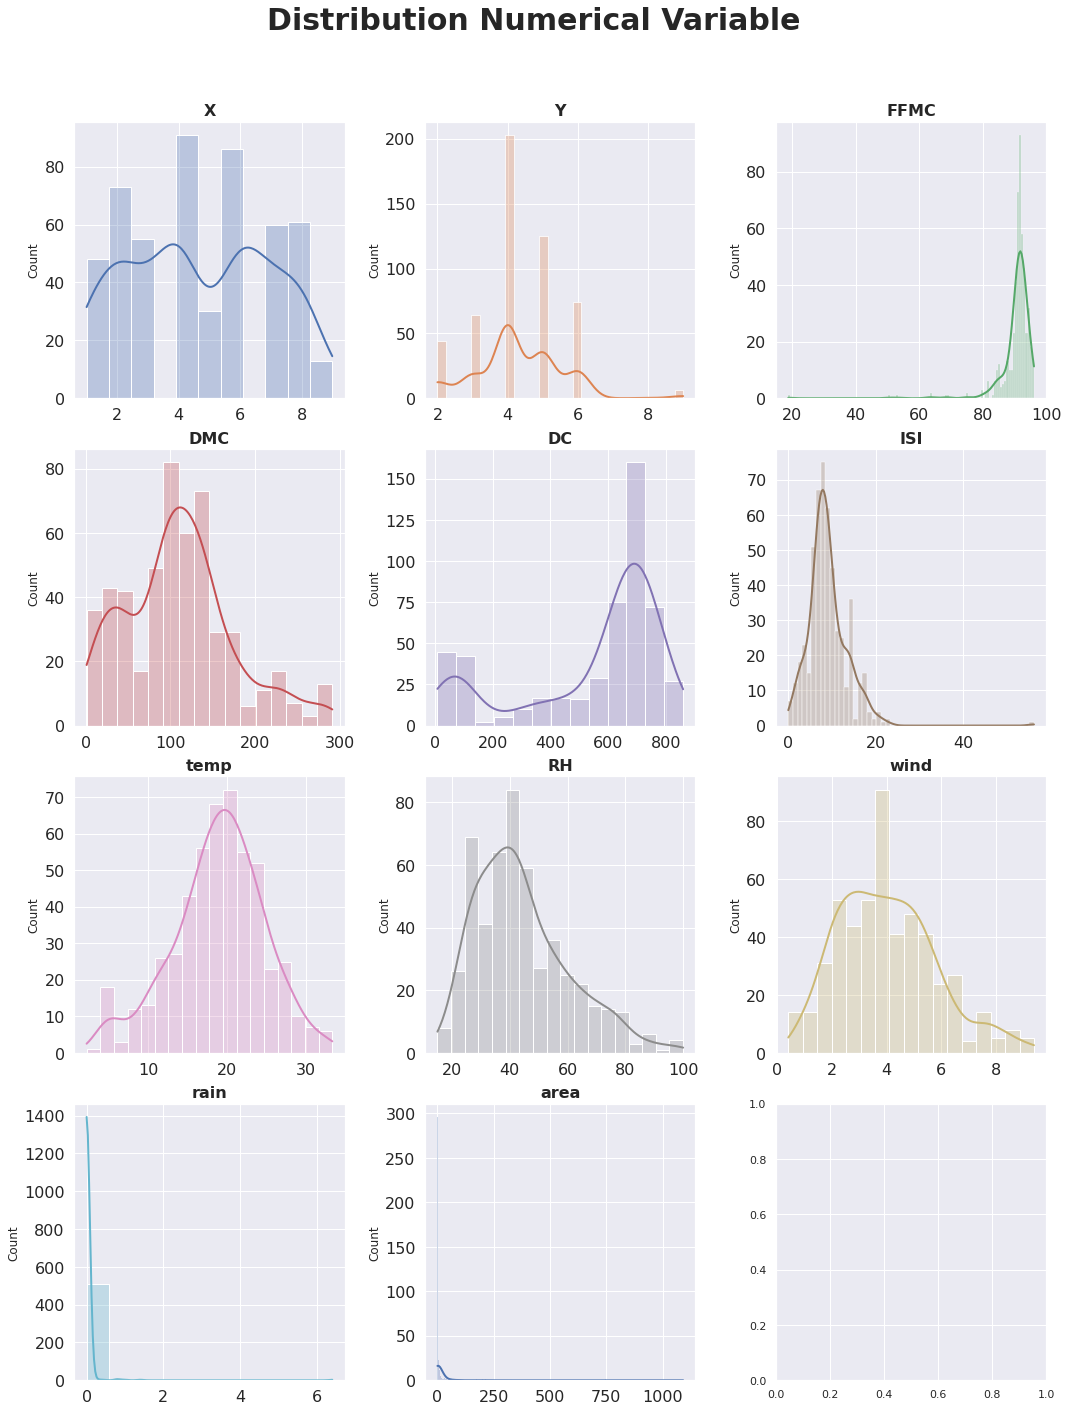

In [13]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15, 20))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable.png");

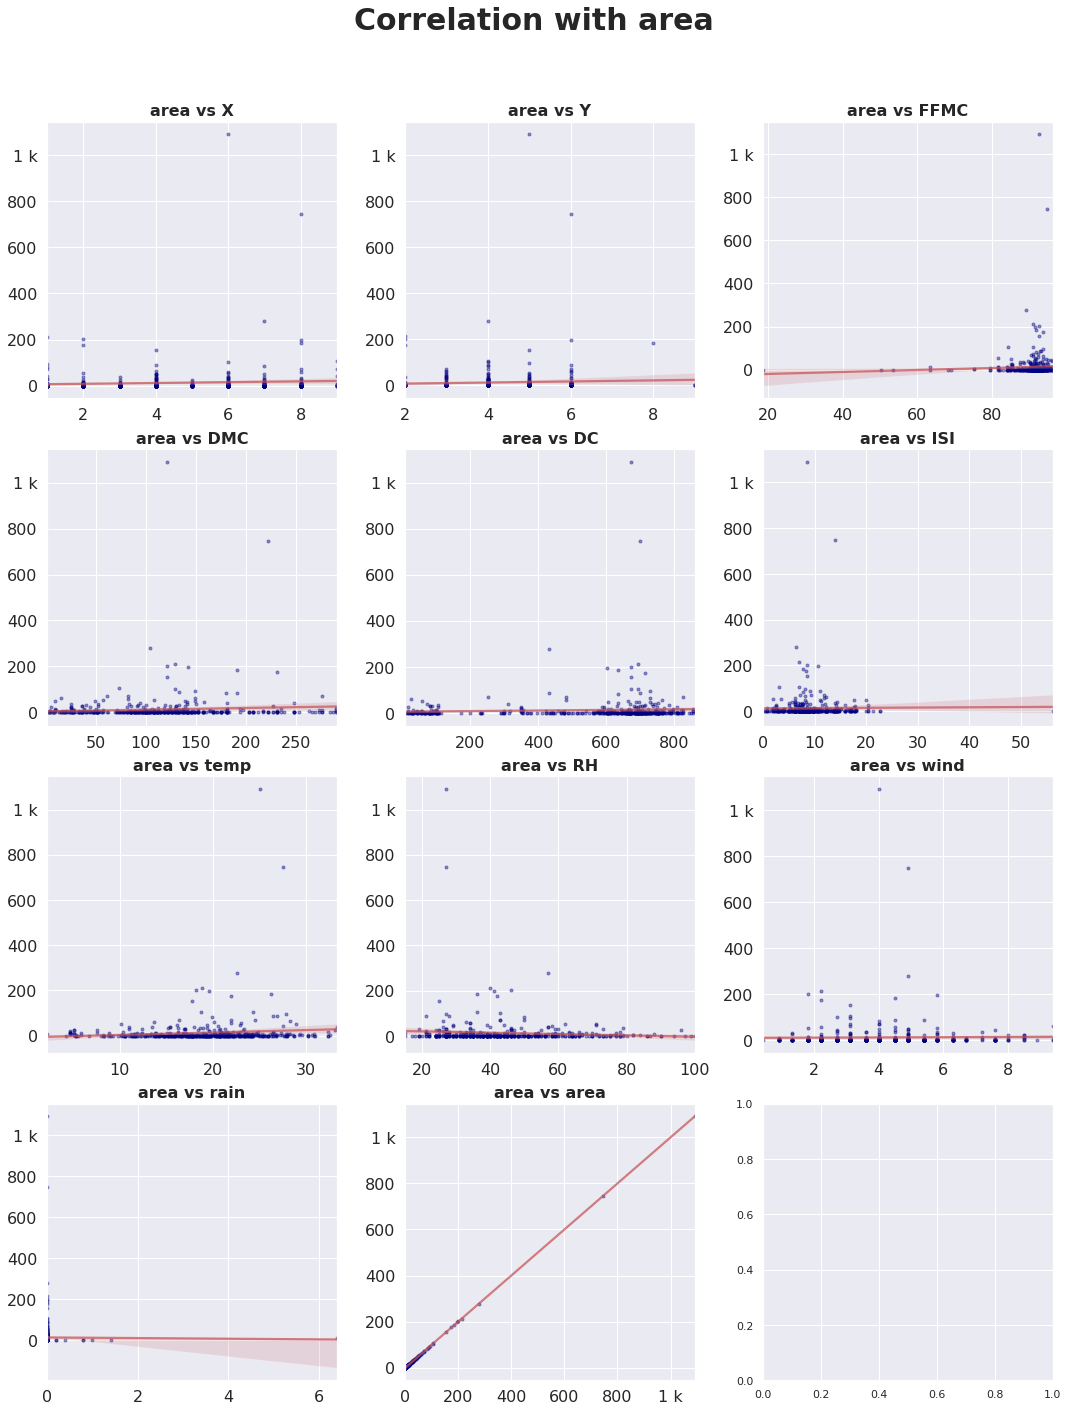

In [14]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15, 20))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
#columnas_numeric = columnas_numeric.drop('area')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['area'],
        color       = "navy",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"area vs {colum}", fontsize = 16, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Se eliminan los axes vacíos
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with area', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Each_Numerical_Variable.png");

In [15]:

# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
47,DC,DMC,0.682192,0.682192
37,DMC,DC,0.682192,0.682192
1,X,Y,0.539548,0.539548
11,Y,X,0.539548,0.539548
27,FFMC,ISI,0.531805,0.531805
57,ISI,FFMC,0.531805,0.531805
83,RH,temp,-0.527390,0.527390
73,temp,RH,-0.527390,0.527390
70,temp,DC,0.496208,0.496208
50,DC,temp,0.496208,0.496208


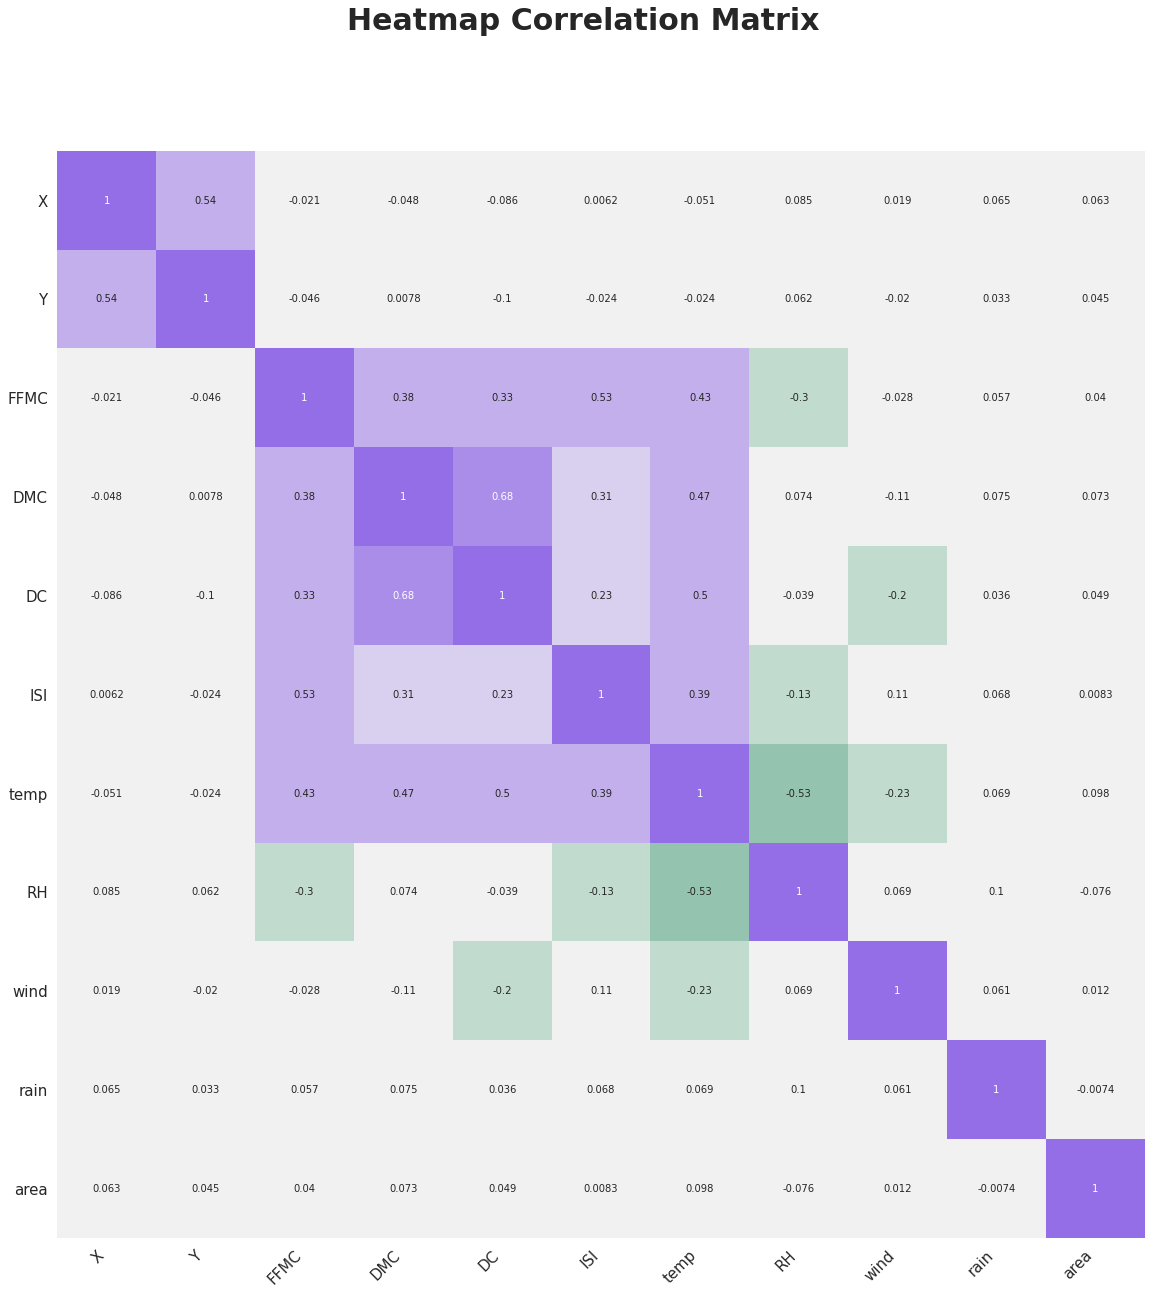

In [16]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)
fig.suptitle('Heatmap Correlation Matrix', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Heatmap_Matrix_Correlations.png");

In [17]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


## Qualitative variables

### Graph Pie chart's for each qualitative variables

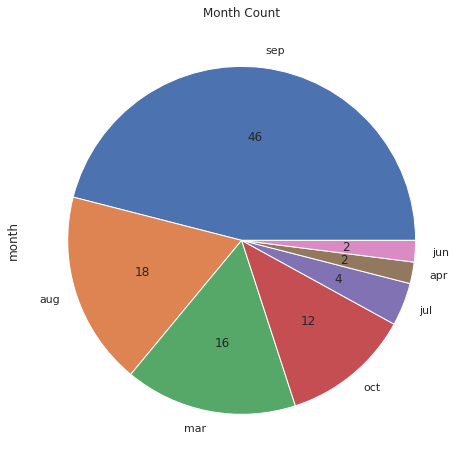

In [18]:
# Pie chart de Months
plot = df['month'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(8, 8),
                                            title='Month Count')

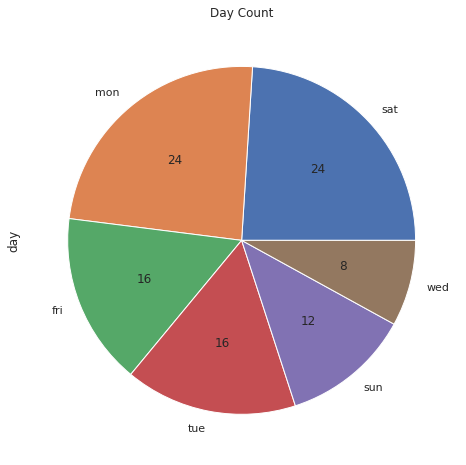

In [19]:
# Pie chart de Months
plot = df['day'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(8, 8),
                                            title='Day Count')

In [20]:
df.drop_duplicates(inplace=True)

## Transform Categorical Variables

In [21]:
# Ordinal encoding 
encoder = OrdinalEncoder()

df[['month', 'day']]= encoder.fit_transform(df[['month', 'day']])

In [22]:
df.to_csv(path + "processed/forestfiresProcessed.csv", index = False, header = True)

******************************
******************************
******************************
******************************

## Divide the data set into training set and test set

In [23]:
df = pd.read_csv(path + 'processed/forestfiresProcessed.csv')

In [24]:
# Matrix
X = df.drop(['area'], axis = 'columns')
# Vector
y = df['area']

In [25]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6858)

## Checking if the training set was correcly splitted

In [26]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (410, 12) Target:  (410,)
Test set - Features:  (103, 12) Target:  (103,)


## Checking  Train, Test partition

In [27]:
print(">>>Train partition")
print("-----------------------")
print(y_train.describe())

>>>Train partition
-----------------------
count     410.000000
mean       13.551463
std        70.299104
min         0.000000
25%         0.000000
50%         0.545000
75%         6.570000
max      1090.840000
Name: area, dtype: float64


In [28]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count    103.000000
mean      10.264951
std       25.813430
min        0.000000
25%        0.000000
50%        0.520000
75%        6.465000
max      200.940000
Name: area, dtype: float64


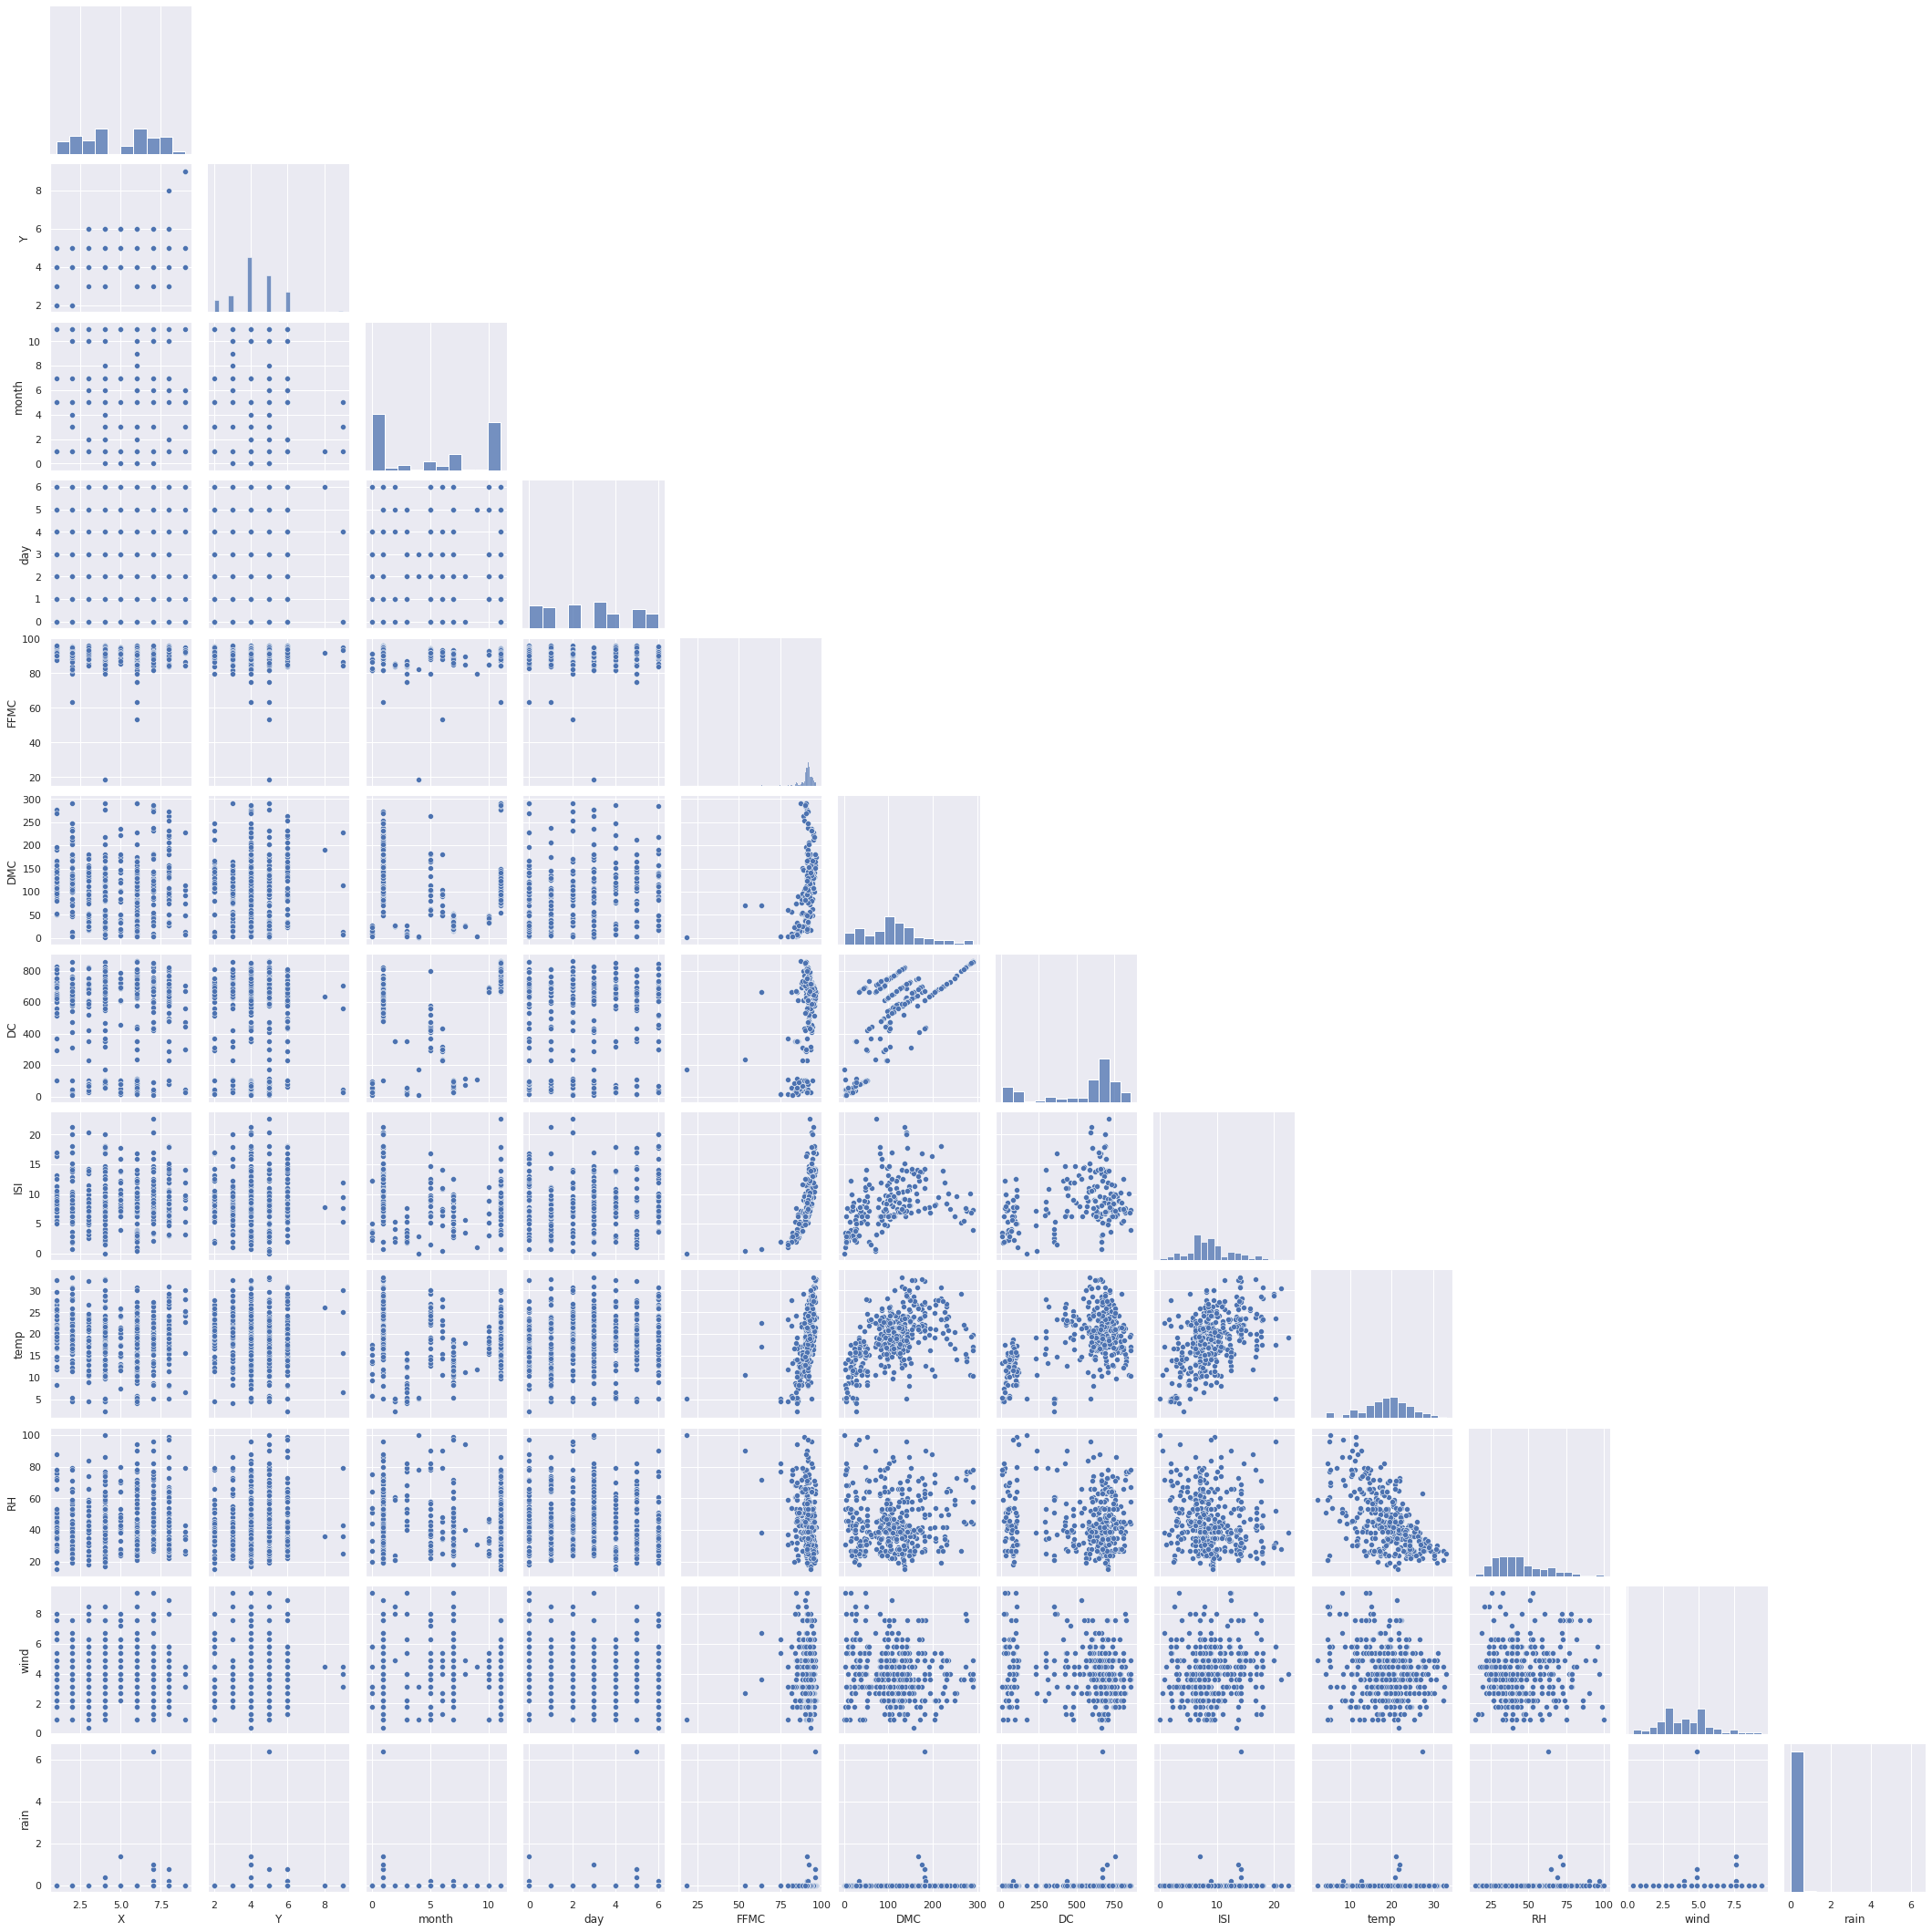

In [29]:
sns.pairplot(X_train.round(3), corner=True)
plt.savefig("../reports/figures/train_pairplot.png")

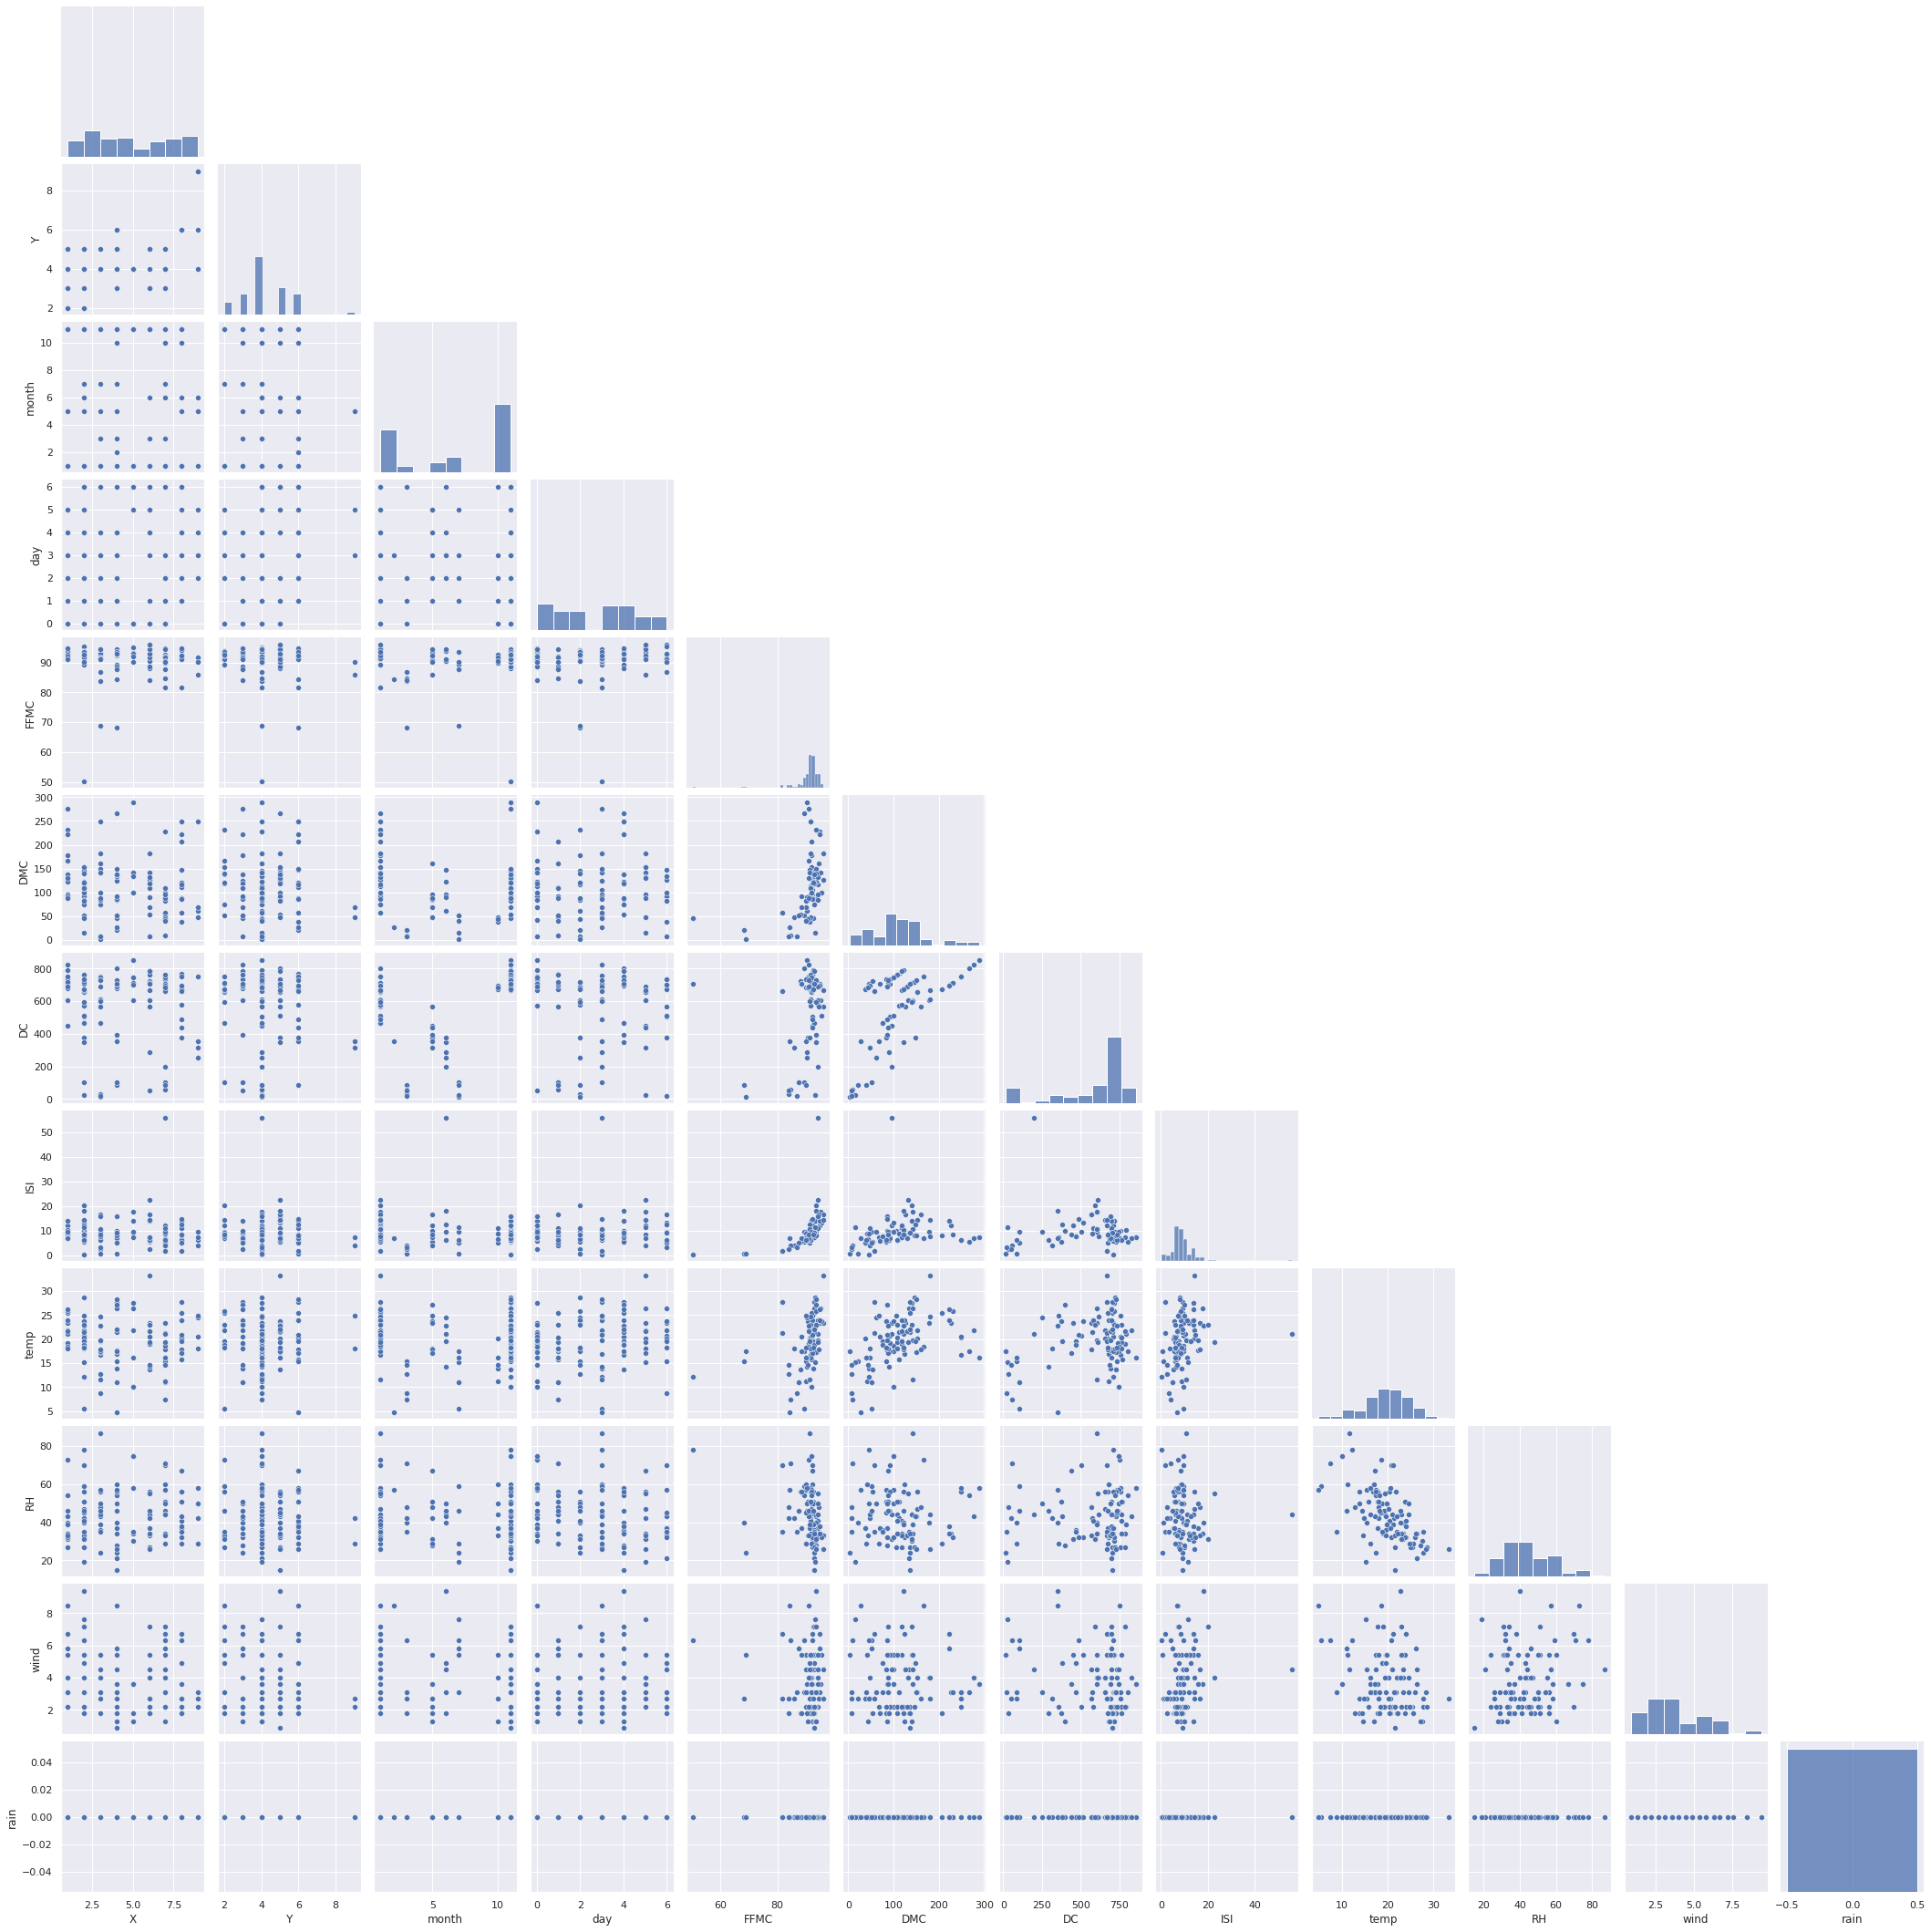

In [30]:
sns.pairplot(X_test.round(3), corner=True)
plt.savefig("../reports/figures/test_pairplot.png")

In [31]:
X_train.to_csv(path + "interim/X_train.csv", index = False, header = True)
X_test.to_csv(path + "interim/X_test.csv", index = False, header = True)

In [32]:
# Division of the data in train and test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = "area"),
                                        df['area'],
                                        random_state = 6858
                                    )
# Creation of the model
# ==============================================================================
model = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 6858
         )

# Model training
# ==============================================================================
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=6858)

In [33]:
# Initial model test error
# ==============================================================================
pred = model.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred,
        squared = False
       )
print(f"The test error (rmse) is: {rmse}")

The test error (rmse) is: 32.91663491061252


Optimal value of n_estimators: 1


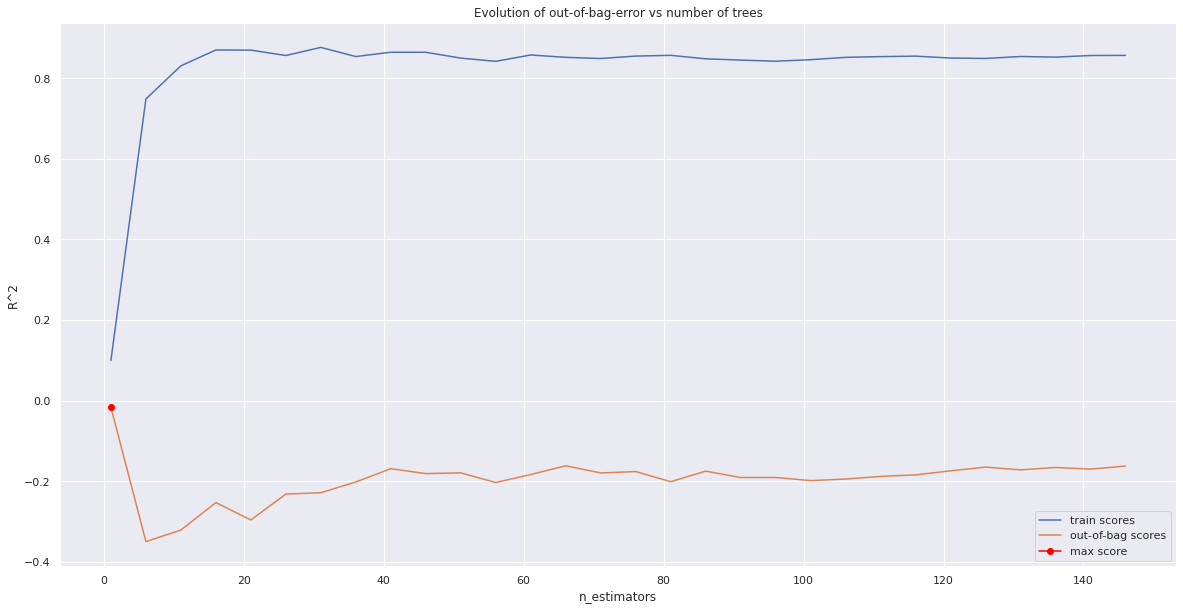

In [34]:
# Validation using the Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Evaluated values
estimator_range = range(1, 150, 5)

# Loop to train a model with each value of n_estimators 
# and extract its error training and Out-of-Bag.

for n_estimators in estimator_range:
    model = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 6858
             )
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    oob_scores.append(model.oob_score_)
    
# Graph with the evolution of errors
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolution of out-of-bag-error vs number of trees")
plt.legend()
print(f"Optimal value of n_estimators: {estimator_range[np.argmax(oob_scores)]}");

Optimal value of n_estimators: 1


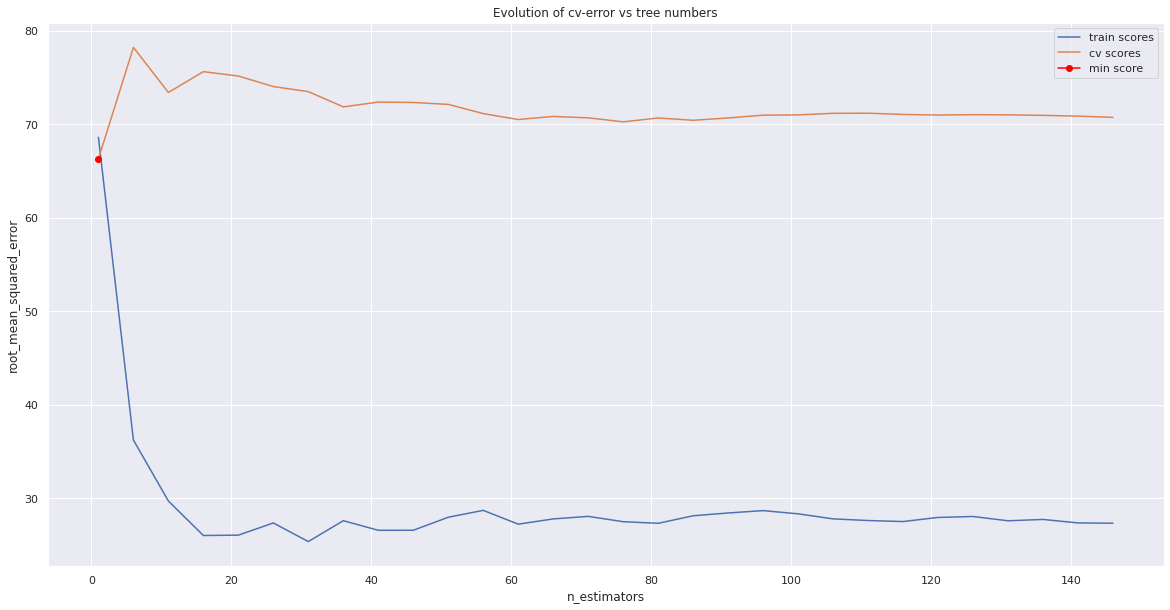

In [35]:
# Validation using k-cross-validation and neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Evaluated values
estimator_range = range(1, 150, 5)

# Loop to train a model with each value of n_estimators and extract its error
# of training and k-cross-validation.

for n_estimators in estimator_range:

    model = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 6858
             )
    
    # Train error
    model.fit(X_train, y_train)
    pred = model.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = pred,
            squared = False
           )
    train_scores.append(rmse)
    
    # Cross validation error
    scores = cross_val_score(
                estimator = model,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # The scores from cross_val_score () are added and it becomes positive
    cv_scores.append(-1*scores.mean())
    
# Graph with the evolution of errors
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolution of cv-error vs tree numbers")
plt.legend();
print(f"Optimal value of n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Optimal value of max_features: 1


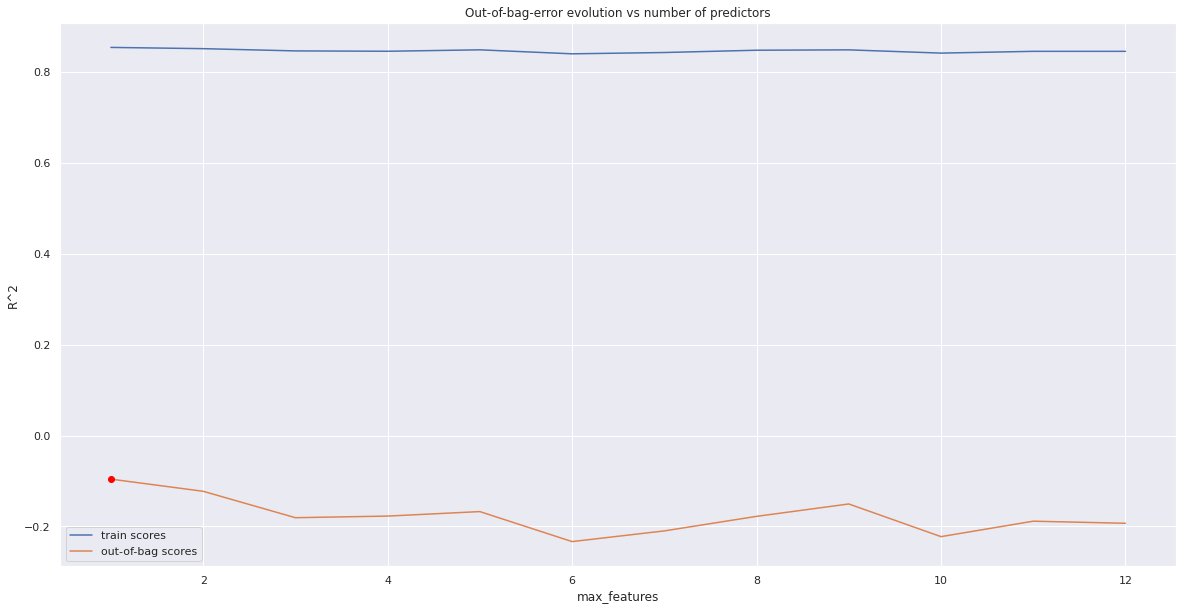

In [36]:
# Validation using the Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Evaluated values
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop to train a model with each value of max_features and extract its error
# of Training and Out-of-Bag.
for max_features in max_features_range:
    model = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 6858
             )
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    oob_scores.append(model.oob_score_)
    
# Graph with the evolution of errors
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Out-of-bag-error evolution vs number of predictors")
plt.legend();
print(f"Optimal value of max_features: {max_features_range[np.argmax(oob_scores)]}")

Optimal value of max_features: 1


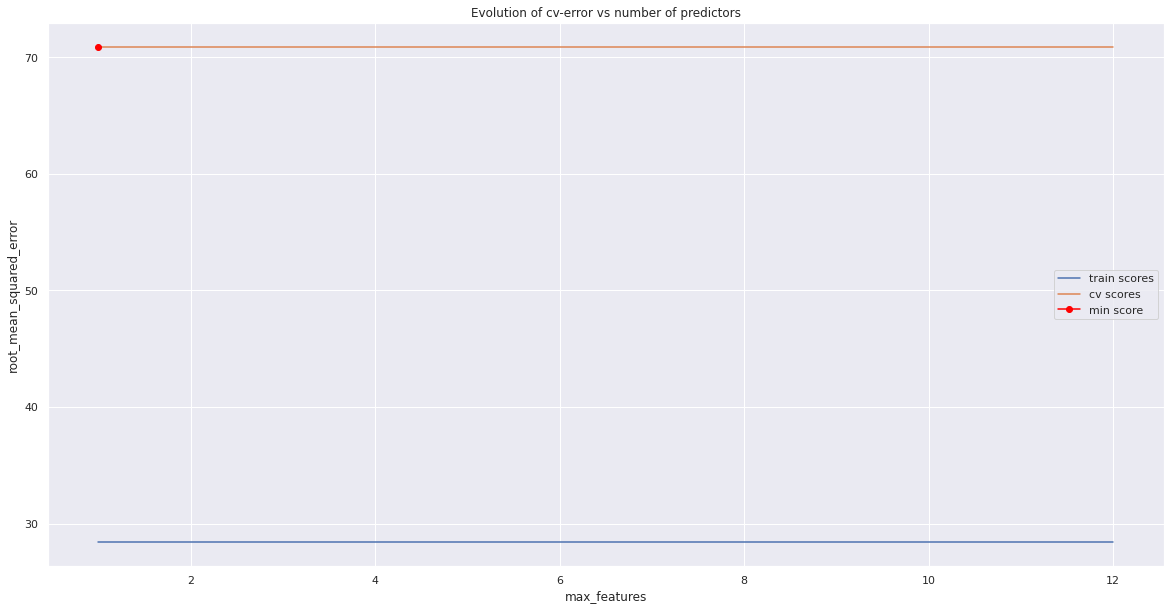

In [37]:
# Validation using k-cross-validation and neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Evaluated values
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop to train a model with each value of max_features and extract its error
# of training and k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 6858
             )
    
    # Train Error
    model.fit(X_train, y_train)
    pred = model.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = pred,
            squared = False
           )
    train_scores.append(rmse)
    
    # Cross validation error
    scores = cross_val_score(
                estimator = model,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # The scores from cross_val_score () are added and it becomes positive
    cv_scores.append(-1*scores.mean())
    
# Graph with the evolution of errors
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolution of cv-error vs number of predictors")
plt.legend();
print(f"Optimal value of max_features: {max_features_range[np.argmin(cv_scores)]}")

In [38]:
# PARALLELIZED VERSION
# ==============================================================================

# Grid of evaluated hyperparameters
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [3, 5, 7, 9, 12],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Parallelized loop to fit a model with each combination of hyperparameters
# ==============================================================================
def eval_oob_error(X, y, modelo, params, verbose=True):
    """
    Function to train a model using certain parameters
    and that returns the out-of-bag error
    """
    model.set_params(
        oob_score    = True,
        n_jobs       = -1,
        random_state = 6858,
        ** params            
    )
    
    model.fit(X, y)
    
    if verbose:
        print(f"Model: {params} \u2713")
        
    return{'params': params, 'oob_r2': model.oob_score_}


n_jobs     = multiprocessing.cpu_count() -1
pool       = multiprocessing.Pool(processes=n_jobs)
results = pool.starmap(
                eval_oob_error,
                [(X_train, y_train, RandomForestRegressor(), params) for params in param_grid]
             )

# Results
# ==============================================================================
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.drop(columns = 'params')
results = results.sort_values('oob_r2', ascending=False)
results.head(4)

Model: {'max_depth': 3, 'max_features': 3, 'n_estimators': 150} ✓
Model: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓Model: {'max_depth': None, 'max_features': 3, 'n_estimators': 150} ✓Model: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓


Model: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Model: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Model: {'max_depth': None, 'max_features': 12, 'n_estimators': 150} ✓
Model: {'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Model: {'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Model: {'max_depth': 3, 'max_features': 12, 'n_estimators': 150} ✓
Model: {'max_depth': 10, 'max_features': 3, 'n_estimators': 150} ✓
Model: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Model: {'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Model: {'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Model: {'max_depth': 20, 'max_features': 5, 'n_estimato

,oob_r2,max_depth,max_features,n_estimators
5,-0.065958,3.0,3.0,150.0
7,-0.094885,3.0,7.0,150.0
8,-0.095310,3.0,9.0,150.0
6,-0.111409,3.0,5.0,150.0


In [39]:
# Better hyperparameters for out-of-bag error
# ==============================================================================
print("--------------------------------------------")
print("Best hyperparameters found (oob-r2)")
print("--------------------------------------------")
print(results.iloc[0,0], ":", results.iloc[0,:]['oob_r2'], "R2")

--------------------------------------------
Best hyperparameters found (oob-r2)
--------------------------------------------
-0.06595815480641742 : -0.06595815480641742 R2


In [40]:
# Grid of evaluated hyperparameters
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [3, 5, 7, 9, 12],
              'max_depth'   : [None, 3, 10, 20]
             }

# Search by grid search with cross validation
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 6858),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats= 3, random_state= 6858), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Results
# ==============================================================================
Results = pd.DataFrame(grid.cv_results_)
Results.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
5,3,3,150,-62.649903,39.937097,-52.519937,10.772467
6,3,5,150,-64.322520,39.221021,-46.609670,9.157092
15,20,3,150,-64.731674,38.059993,-27.983281,4.861228
0,None,3,150,-64.753332,38.063685,-27.965758,4.840033


In [41]:
# Better hyperparameters by cross-validation
# ==============================================================================
print("----------------------------------------")
print("Best hyperparameters found (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Best hyperparameters found (cv)
----------------------------------------
{'max_depth': 3, 'max_features': 3, 'n_estimators': 150} : -62.64990328386149 neg_root_mean_squared_error


******************************
******************************
******************************
******************************

# Text Analytics using NLTK

## Data reading

In [42]:
# Data reading
# ==============================================================================
# I Have a Dream
# Martin Luther King, Jr.
# ==============================================================================

https://www.huffpost.com/entry/i-have-a-dream-speech-text_n_809993

In [43]:
speech=[]

with open (path+ 'external/I_have_a_dream.txt',mode='r') as file:
    lines = file.readlines()
    for line in lines:
        speech.append(line.strip())

In [44]:
speech_txt =' '.join(speech).lower().replace('"','')

In [45]:
print(speech_txt)

i have a dream martin luther king, jr. rhetorical context:  martin luther king’s i have a dream was the keynote speech delivered on the steps at the lincoln memorial in washington d.c. on august 28, 1963.  some 250,000 people had assembled to hear king speak as part of the 1963 march on washington for jobs and freedom. “the speech was also broadcast on tv and published in newspapers. since 1963, king's “i have a dream” speech has become the most famous public address of 20th century america. the immediate effect of the speech also shaped american history.  julian bond, a fellow participant in the civil rights movement and student of king, would write, king's dramatic 1963 'i have a dream' speech before the lincoln memorial cemented his place as first among equals in civil rights leadership; from this first televised mass meeting, an american audience saw and heard the unedited oratory of america's finest preacher, and for the first time, a mass white audience heard the undeniable justi

## Sentence Tokenization
- Sentence tokenizer breaks text paragraph into sentences.


In [46]:
# Sentence Tokens

sentences = sent_tokenize(speech_txt)

print(sentences[:10])

['i have a dream martin luther king, jr. rhetorical context:  martin luther king’s i have a dream was the keynote speech delivered on the steps at the lincoln memorial in washington d.c. on august 28, 1963.  some 250,000 people had assembled to hear king speak as part of the 1963 march on washington for jobs and freedom.', '“the speech was also broadcast on tv and published in newspapers.', "since 1963, king's “i have a dream” speech has become the most famous public address of 20th century america.", 'the immediate effect of the speech also shaped american history.', "julian bond, a fellow participant in the civil rights movement and student of king, would write, king's dramatic 1963 'i have a dream' speech before the lincoln memorial cemented his place as first among equals in civil rights leadership; from this first televised mass meeting, an american audience saw and heard the unedited oratory of america's finest preacher, and for the first time, a mass white audience heard the und

### Frequency of appearance of sentences

In [47]:
fdist_sentences = FreqDist(sentences)

In [48]:
fdist_sentences.most_common(10)

[('i have a dream today.', 2),
 ('i have a dream martin luther king, jr. rhetorical context:  martin luther king’s i have a dream was the keynote speech delivered on the steps at the lincoln memorial in washington d.c. on august 28, 1963.  some 250,000 people had assembled to hear king speak as part of the 1963 march on washington for jobs and freedom.',
  1),
 ('“the speech was also broadcast on tv and published in newspapers.', 1),
 ("since 1963, king's “i have a dream” speech has become the most famous public address of 20th century america.",
  1),
 ('the immediate effect of the speech also shaped american history.', 1),
 ("julian bond, a fellow participant in the civil rights movement and student of king, would write, king's dramatic 1963 'i have a dream' speech before the lincoln memorial cemented his place as first among equals in civil rights leadership; from this first televised mass meeting, an american audience saw and heard the unedited oratory of america's finest preacher,

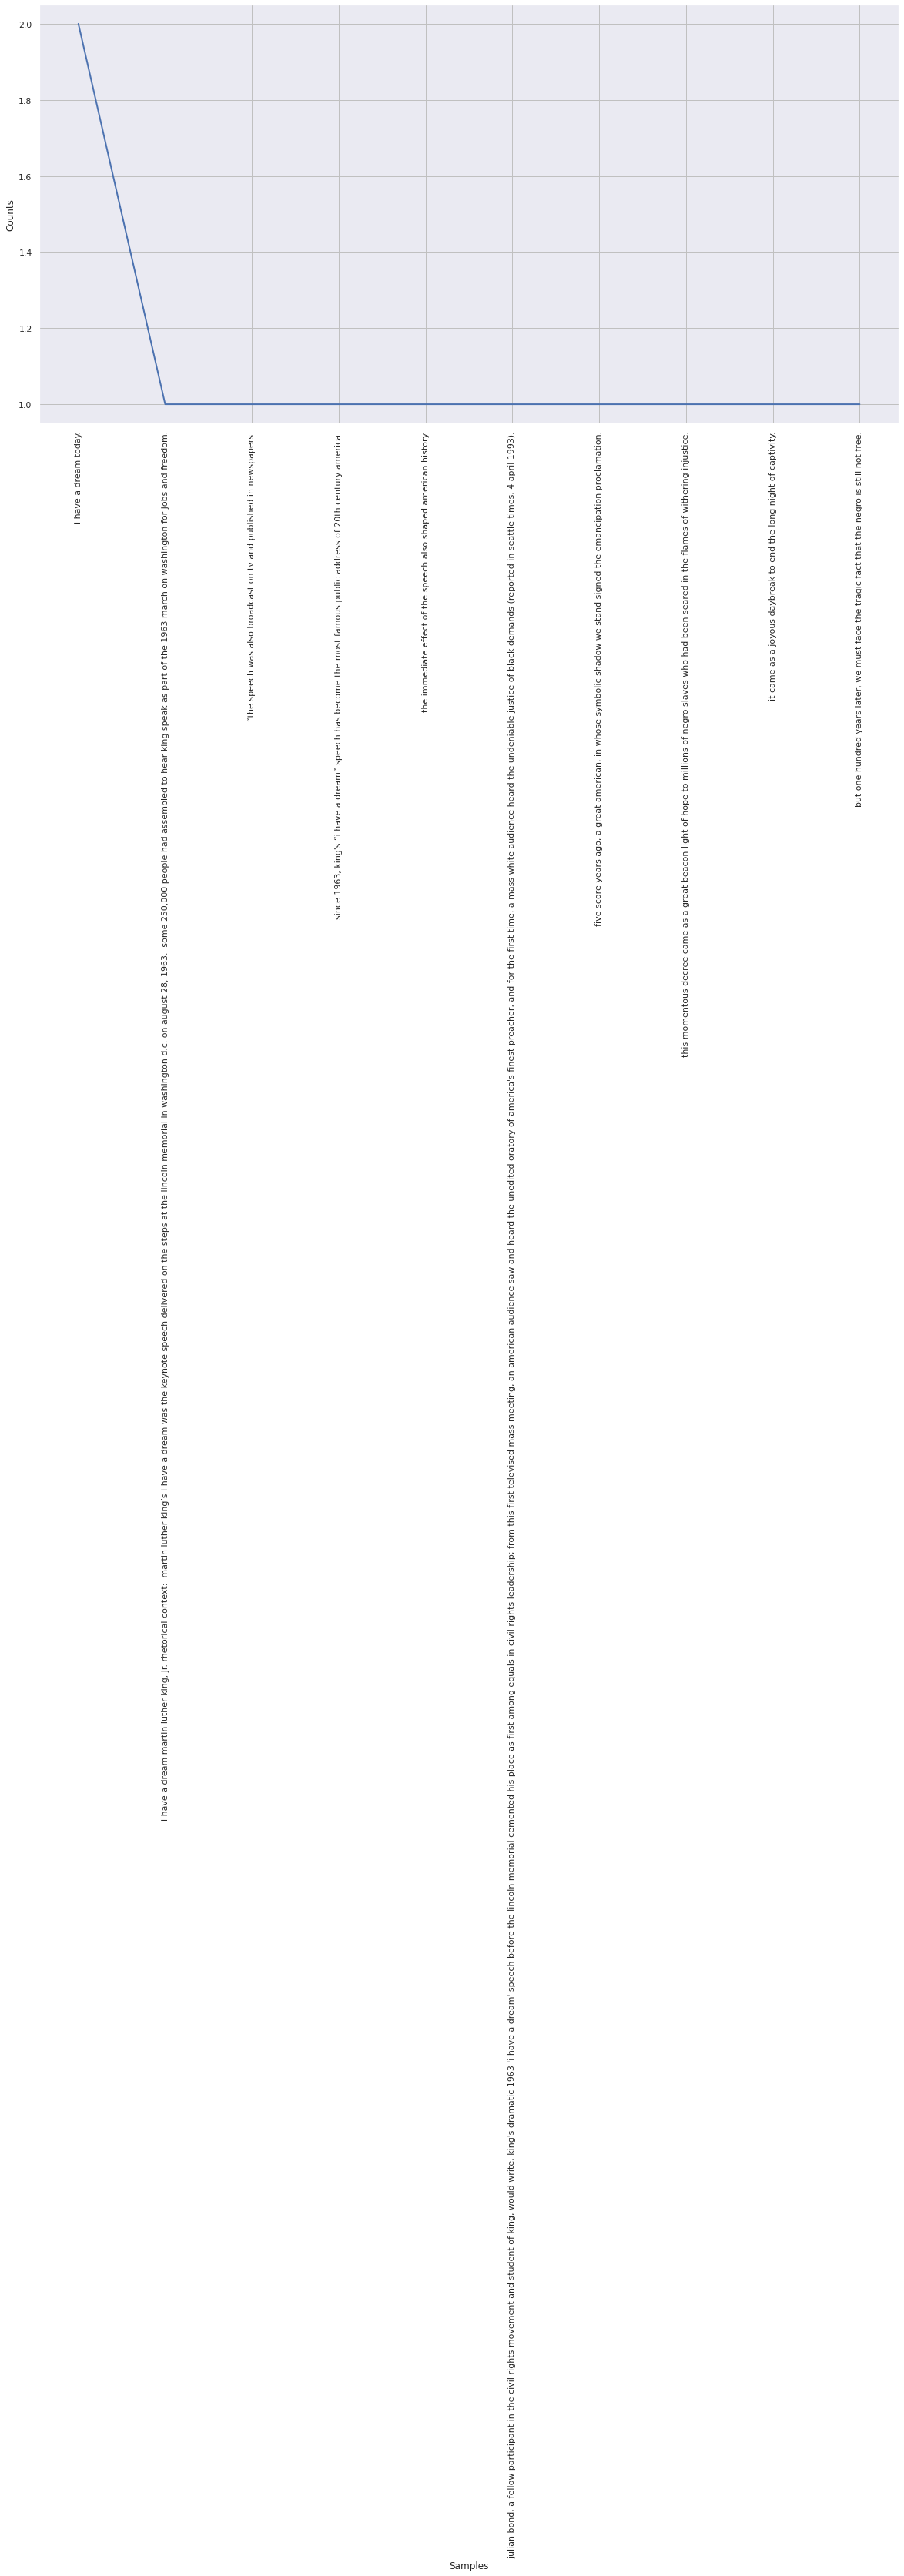

In [49]:
# Frequency sentences Distribution Plot

plt.subplots(figsize=(20,10))
fdist_sentences.plot(10, cumulative=False)
plt.show()

## Word Tokenization
- Word tokenizer breaks text paragraph into words

In [50]:
# Words Tokens

words= word_tokenize(speech_txt)

print(words[:50])

['i', 'have', 'a', 'dream', 'martin', 'luther', 'king', ',', 'jr.', 'rhetorical', 'context', ':', 'martin', 'luther', 'king', '’', 's', 'i', 'have', 'a', 'dream', 'was', 'the', 'keynote', 'speech', 'delivered', 'on', 'the', 'steps', 'at', 'the', 'lincoln', 'memorial', 'in', 'washington', 'd.c.', 'on', 'august', '28', ',', '1963.', 'some', '250,000', 'people', 'had', 'assembled', 'to', 'hear', 'king', 'speak']


### Frequency of appearance of words

In [51]:
fdist = FreqDist(words)

In [52]:
fdist.most_common(10)

[('the', 112),
 ('of', 102),
 ('.', 75),
 (',', 71),
 ('to', 58),
 ('and', 49),
 ('a', 42),
 ('we', 31),
 ('be', 31),
 ('will', 26)]

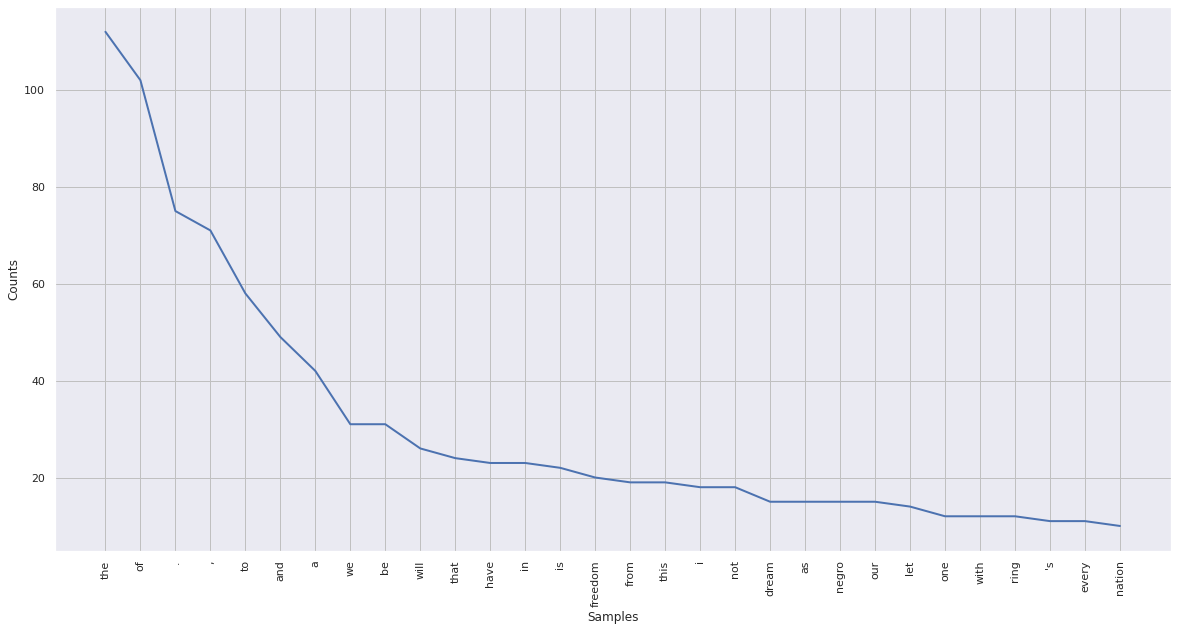

In [53]:
# Frequency words Distribution Plot

plt.subplots(figsize=(20,10))
fdist.plot(30,cumulative=False)
plt.show()

In [54]:
# WordPunct Tokens

wpt = WordPunctTokenizer()

words_tokens_wpt= wpt.tokenize(speech_txt)

print(words_tokens_wpt[:50])

['i', 'have', 'a', 'dream', 'martin', 'luther', 'king', ',', 'jr', '.', 'rhetorical', 'context', ':', 'martin', 'luther', 'king', '’', 's', 'i', 'have', 'a', 'dream', 'was', 'the', 'keynote', 'speech', 'delivered', 'on', 'the', 'steps', 'at', 'the', 'lincoln', 'memorial', 'in', 'washington', 'd', '.', 'c', '.', 'on', 'august', '28', ',', '1963', '.', 'some', '250', ',', '000']


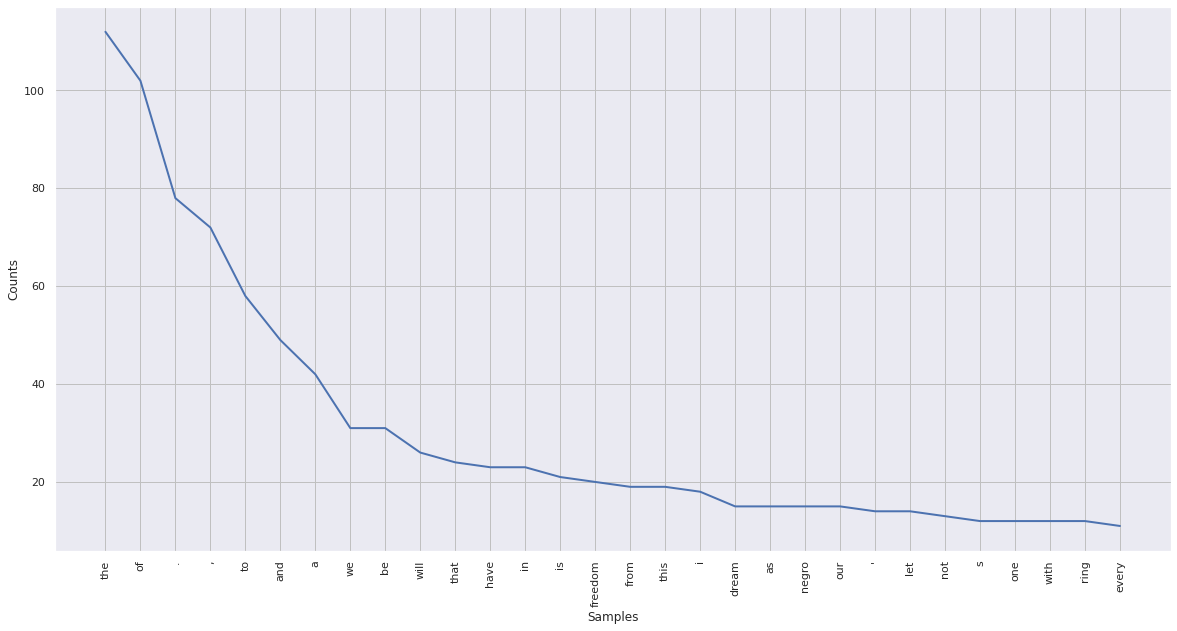

In [55]:
fdist = FreqDist(words_tokens_wpt)

plt.subplots(figsize=(20,10))
fdist.plot(30,cumulative=False)
plt.show()

In [56]:
# Regex Tokens
 
speech_tokens_regex = regexp_tokenize(speech_txt, "[\w']+")

print(speech_tokens_regex[:50])

['i', 'have', 'a', 'dream', 'martin', 'luther', 'king', 'jr', 'rhetorical', 'context', 'martin', 'luther', 'king', 's', 'i', 'have', 'a', 'dream', 'was', 'the', 'keynote', 'speech', 'delivered', 'on', 'the', 'steps', 'at', 'the', 'lincoln', 'memorial', 'in', 'washington', 'd', 'c', 'on', 'august', '28', '1963', 'some', '250', '000', 'people', 'had', 'assembled', 'to', 'hear', 'king', 'speak', 'as', 'part']


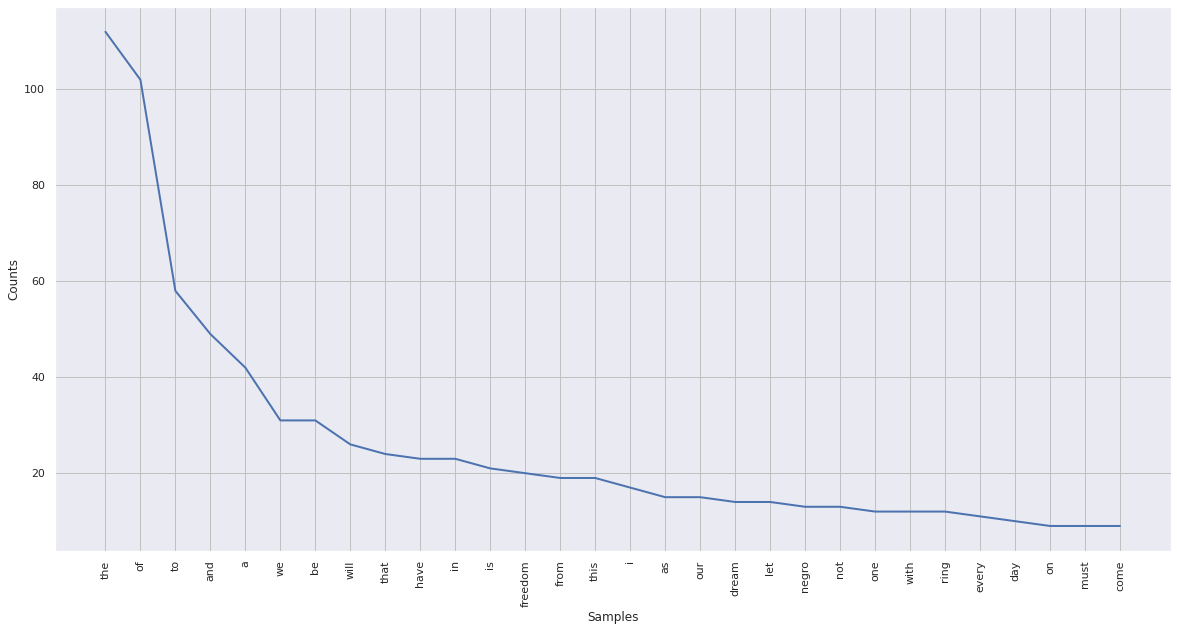

In [57]:
fdist = FreqDist(speech_tokens_regex)

plt.subplots(figsize=(20,10))
fdist.plot(30,cumulative=False)
plt.show()

## Stopwords

In [58]:
stop_words = set(stopwords.words("english"))

print(stop_words)

{'ours', 'aren', 'can', 'of', 'me', 'when', "should've", "didn't", 'have', 'all', 'through', 'who', 'while', 'them', 'after', 'that', 've', 'and', 'mustn', 'isn', 'hers', 'is', 'weren', 'didn', 'no', 'because', "mightn't", 'too', 'him', 'from', "shouldn't", 're', 'our', 'had', 'if', 'below', 'then', 'hasn', 'shouldn', "needn't", 'up', 'this', 'you', 'was', 'has', "it's", 'mightn', 'further', 'with', 'are', "hadn't", 'to', 'having', 'an', "hasn't", "weren't", 'be', 'again', 'yours', 'but', 'such', 'few', 'why', 'how', 'yourself', 'on', 'what', 'my', 'as', "you're", 'some', 'being', 'haven', 'her', 'whom', 'does', 'any', 'yourselves', 'hadn', 'should', 'shan', 'o', 'during', 'own', 'do', "that'll", "wasn't", 'where', 'won', 'y', 'wouldn', 'more', 'over', 'which', 'for', 'than', 'these', 'above', 'about', 'himself', "couldn't", 'at', 'before', "doesn't", 'ma', 'couldn', 'itself', 'into', 'i', 'until', 'themselves', 'needn', 'doing', 'ain', 'very', 'we', "wouldn't", 'been', 'there', 'herse

## Removing Stopwords

In [59]:
filtered_sent = [w for w in speech_tokens_regex if w not in stop_words]

In [60]:
print("Filterd Sentence:", filtered_sent)

Filterd Sentence: ['dream', 'martin', 'luther', 'king', 'jr', 'rhetorical', 'context', 'martin', 'luther', 'king', 'dream', 'keynote', 'speech', 'delivered', 'steps', 'lincoln', 'memorial', 'washington', 'c', 'august', '28', '1963', '250', '000', 'people', 'assembled', 'hear', 'king', 'speak', 'part', '1963', 'march', 'washington', 'jobs', 'freedom', 'speech', 'also', 'broadcast', 'tv', 'published', 'newspapers', 'since', '1963', "king's", 'dream', 'speech', 'become', 'famous', 'public', 'address', '20th', 'century', 'america', 'immediate', 'effect', 'speech', 'also', 'shaped', 'american', 'history', 'julian', 'bond', 'fellow', 'participant', 'civil', 'rights', 'movement', 'student', 'king', 'would', 'write', "king's", 'dramatic', '1963', "'i", "dream'", 'speech', 'lincoln', 'memorial', 'cemented', 'place', 'first', 'among', 'equals', 'civil', 'rights', 'leadership', 'first', 'televised', 'mass', 'meeting', 'american', 'audience', 'saw', 'heard', 'unedited', 'oratory', "america's", 'fi

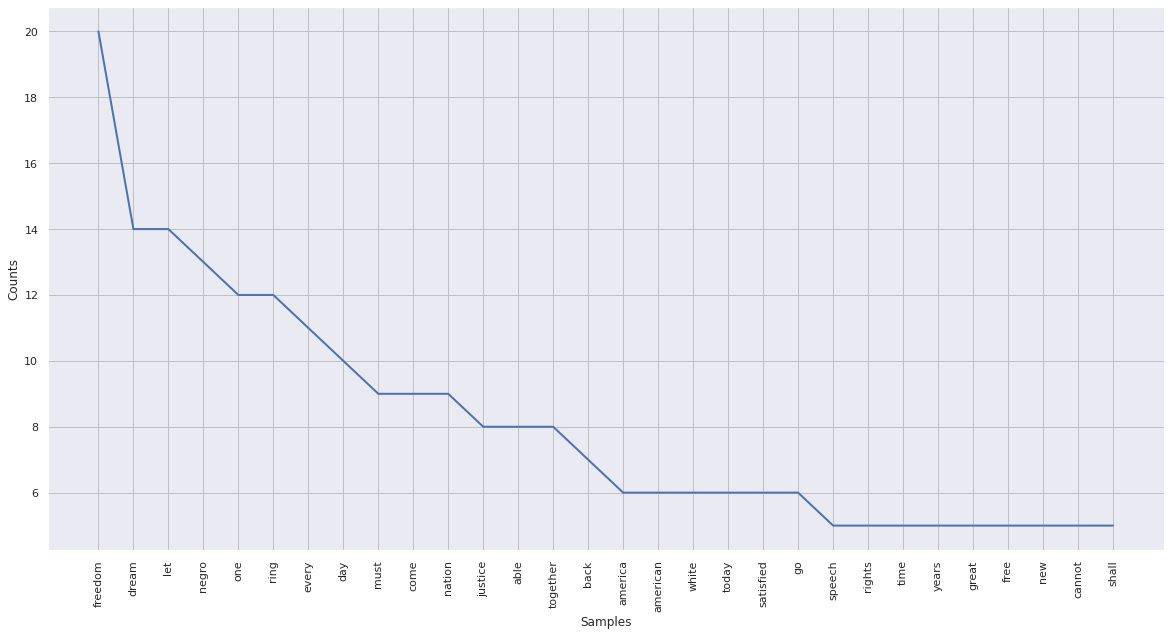

In [61]:
# Frequency Distribution Plot

fdist = FreqDist(filtered_sent)

plt.subplots(figsize=(20,10))
fdist.plot(30,cumulative=False)
plt.show()

In [62]:
ps = PorterStemmer()

stemmed_words=[]

for w in filtered_sent:
    stemmed_words.append(ps.stem(w))



In [63]:
print("Stemmed Sentence:", stemmed_words)

Stemmed Sentence: ['dream', 'martin', 'luther', 'king', 'jr', 'rhetor', 'context', 'martin', 'luther', 'king', 'dream', 'keynot', 'speech', 'deliv', 'step', 'lincoln', 'memori', 'washington', 'c', 'august', '28', '1963', '250', '000', 'peopl', 'assembl', 'hear', 'king', 'speak', 'part', '1963', 'march', 'washington', 'job', 'freedom', 'speech', 'also', 'broadcast', 'tv', 'publish', 'newspap', 'sinc', '1963', "king'", 'dream', 'speech', 'becom', 'famou', 'public', 'address', '20th', 'centuri', 'america', 'immedi', 'effect', 'speech', 'also', 'shape', 'american', 'histori', 'julian', 'bond', 'fellow', 'particip', 'civil', 'right', 'movement', 'student', 'king', 'would', 'write', "king'", 'dramat', '1963', "'i", "dream'", 'speech', 'lincoln', 'memori', 'cement', 'place', 'first', 'among', 'equal', 'civil', 'right', 'leadership', 'first', 'televis', 'mass', 'meet', 'american', 'audienc', 'saw', 'heard', 'unedit', 'oratori', "america'", 'finest', 'preacher', 'first', 'time', 'mass', 'white'

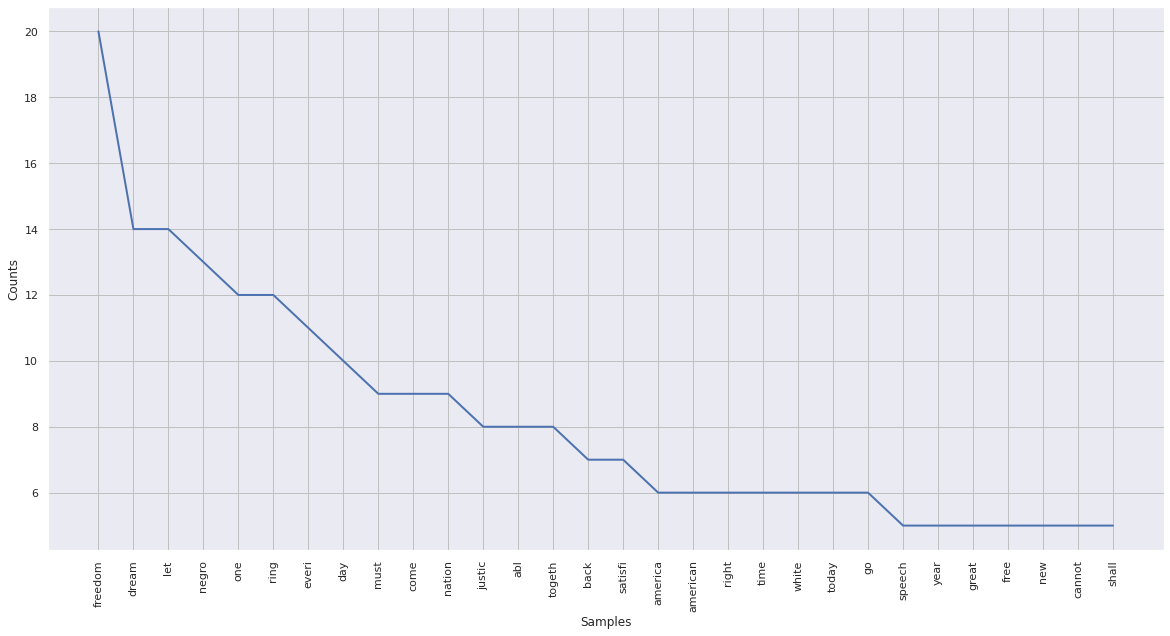

In [64]:
# Frequency Distribution Plot

fdist = FreqDist(stemmed_words)

plt.subplots(figsize=(20,10))
fdist.plot(30,cumulative=False)
plt.show()

## Lemmatization
- Lemmatization reduces words to their base word, which is linguistically correct lemmas

In [65]:
# Lexicon Normalization
# performing stemming and Lemmatization

lem = WordNetLemmatizer()
stem = PorterStemmer()

In [66]:
tagger={'N':'n','V':'v','R':'r','JJ':'a'}

In [67]:
word = 'I have a dream'

print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: I have a dream
Stemmed Word: i have a dream


### POS Tagging
- The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word

In [68]:
def get_wordnet_pos(word):
    
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,"N": wordnet.NOUN,"V": wordnet.VERB,"R": wordnet.ADV,}
    
    return tag_dict.get(tag,wordnet.NOUN)


In [73]:
sentences = nltk.sent_tokenize(speech_txt)
sentences

['i have a dream martin luther king, jr. rhetorical context:  martin luther king’s i have a dream was the keynote speech delivered on the steps at the lincoln memorial in washington d.c. on august 28, 1963.  some 250,000 people had assembled to hear king speak as part of the 1963 march on washington for jobs and freedom.',
 '“the speech was also broadcast on tv and published in newspapers.',
 "since 1963, king's “i have a dream” speech has become the most famous public address of 20th century america.",
 'the immediate effect of the speech also shaped american history.',
 "julian bond, a fellow participant in the civil rights movement and student of king, would write, king's dramatic 1963 'i have a dream' speech before the lincoln memorial cemented his place as first among equals in civil rights leadership; from this first televised mass meeting, an american audience saw and heard the unedited oratory of america's finest preacher, and for the first time, a mass white audience heard the

In [75]:
for sentence in sentences:
    for word in nltk.word_tokenize(sentence):
        print(lem.lemmatize(word, get_wordnet_pos(word)))

i
have
a
dream
martin
luther
king
,
jr.
rhetorical
context
:
martin
luther
king
’
s
i
have
a
dream
be
the
keynote
speech
deliver
on
the
step
at
the
lincoln
memorial
in
washington
d.c.
on
august
28
,
1963.
some
250,000
people
have
assemble
to
hear
king
speak
a
part
of
the
1963
march
on
washington
for
job
and
freedom
.
“
the
speech
be
also
broadcast
on
tv
and
publish
in
newspaper
.
since
1963
,
king
's
“
i
have
a
dream
”
speech
have
become
the
most
famous
public
address
of
20th
century
america
.
the
immediate
effect
of
the
speech
also
shape
american
history
.
julian
bond
,
a
fellow
participant
in
the
civil
right
movement
and
student
of
king
,
would
write
,
king
's
dramatic
1963
'
i
have
a
dream
'
speech
before
the
lincoln
memorial
cement
his
place
a
first
among
equal
in
civil
right
leadership
;
from
this
first
televise
mass
meeting
,
an
american
audience
saw
and
heard
the
unedited
oratory
of
america
's
fine
preacher
,
and
for
the
first
time
,
a
mass
white
audience
heard
the
undeniable
ju

from
every
mountainside
,
let
freedom
ring
.
when
we
let
freedom
ring
,
when
we
let
it
ring
from
every
village
and
every
hamlet
,
from
every
state
and
every
city
,
we
will
be
able
to
speed
up
that
day
when
all
of
god
's
child
,
black
men
and
white
men
,
jew
and
gentile
,
protestant
and
catholic
,
will
be
able
to
join
hand
and
sing
in
the
word
of
the
old
negro
spiritual
,
free
at
last
!
free
at
last
!
thank
god
almighty
,
we
be
free
at
last
!


## Word Cloud

### speech_text

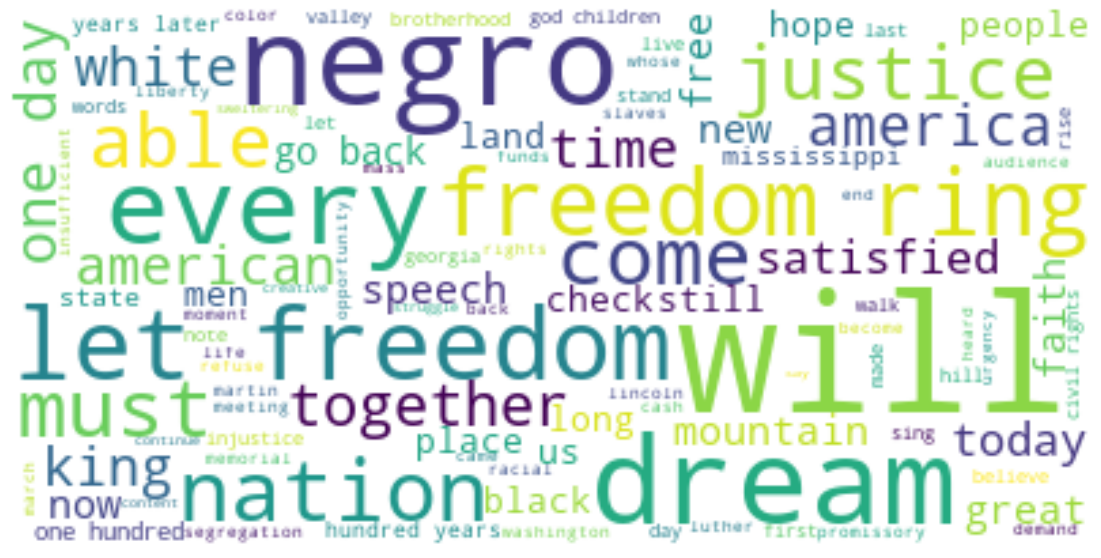

In [76]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=60, max_words=100, background_color="white").generate(speech_txt)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [77]:
# Save the image in the img folder:
wordcloud.to_file("../reports/figures/wordcloud_speech_text.png");

************************
************************
************************
************************

## Level 3

- Exercise 1: 
  - Perform sentiment analysis on your dataset.

# Sentiment Analysis
- Quantifying users content, idea, belief, and opinion is known as sentiment analysis.

https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [78]:
df_Sent_Analysis = pd.read_csv(path + 'processed/train.tsv', sep='\t')

In [79]:
df_Sent_Analysis.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [80]:
df_Sent_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [81]:
df_Sent_Analysis.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

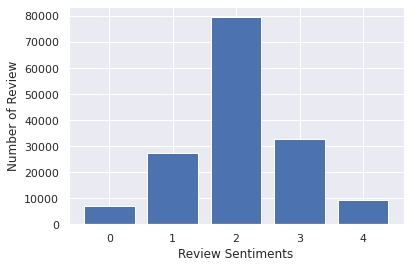

In [82]:
Sentiment_count = df_Sent_Analysis.groupby('Sentiment').count()

plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

## Feature Generation using Bag of Words

In [83]:
# Tokenizer to remove unwanted elements from out data like symbols and numbers

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase= True, stop_words = 'english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts = cv.fit_transform(df_Sent_Analysis['Phrase'])

### Split train and test set

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df_Sent_Analysis['Sentiment'], test_size= 0.3, random_state= 6858)

### Model Building and Evaluation

In [85]:
# Model Generation Using Multinomial Naive Bayes

clf = MultinomialNB().fit(X_train, y_train)

predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

<IPython.core.display.Javascript object>

MultinomialNB Accuracy: 0.609914989961126


## Feature Generation using TF-IDF

In [86]:
tf = TfidfVectorizer()

text_tf = tf.fit_transform(df_Sent_Analysis['Phrase'])

<IPython.core.display.Javascript object>

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df_Sent_Analysis['Sentiment'], test_size= 0.3, random_state= 6858)

In [88]:
# Model Generation Using Multinomial Naive Bayes

clf = MultinomialNB().fit(X_train, y_train)

predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

<IPython.core.display.Javascript object>

MultinomialNB Accuracy: 0.5849673202614379
